In [ ]:
# Project Title
Netflix Content Analysis: Exploring Netflix Movie and TV Series Trends

In [ ]:
## Introduction
This project explores the trends, patterns, and distributions in Netflix's movie and TV series catalog.  
We will examine key metrics such as release year, type (Movie vs. TV Show), duration, genres, and country of origin to uncover patterns in content distribution over time.

The dataset used is sourced from [Kaggle's Netflix Movies and TV Shows dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows).  
We will perform data wrangling and exploratory data analysis (EDA) to answer questions like:

## Tools Used
- **Python**
- **Pandas**, **NumPy**
- **Matplotlib**, **Seaborn**

In [ ]:
# Table of Contents

- Asking Questions
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Results

In [ ]:
# QUESTIONS

Q1: What is the distribution of content on Netflix by year?
Q2: Are movies or TV series more popular on Netflix?
Q3: Which genres are more popular?
Q4: Which countries provide the most content to Netflix?

In [ ]:
## Data Wrangling
We will prepare the environment, load and assess dataset. Subsequently, we also clean and process the data for analysis.

Preparing the Environment

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the Excel file
file_path = r'C:/Users/Monster/Desktop/Exploring Netflix Movie and TV Series Trends.xlsx'
df = pd.read_excel(file_path)

# Quick look at the data
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
Data Overview and Missing Values

In [9]:
# General information about the dataset
df.info()

# Checking for missing values
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
 director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [ ]:
Handle Duplicates

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
Fillna

In [13]:
# Fill the missing country values with “Unknown”
df['country'] = df['country'].fillna('Unknown')

In [ ]:
Exploratory Data Analysis


In [ ]:
Q1: What is the distribution of content on Netflix by year?

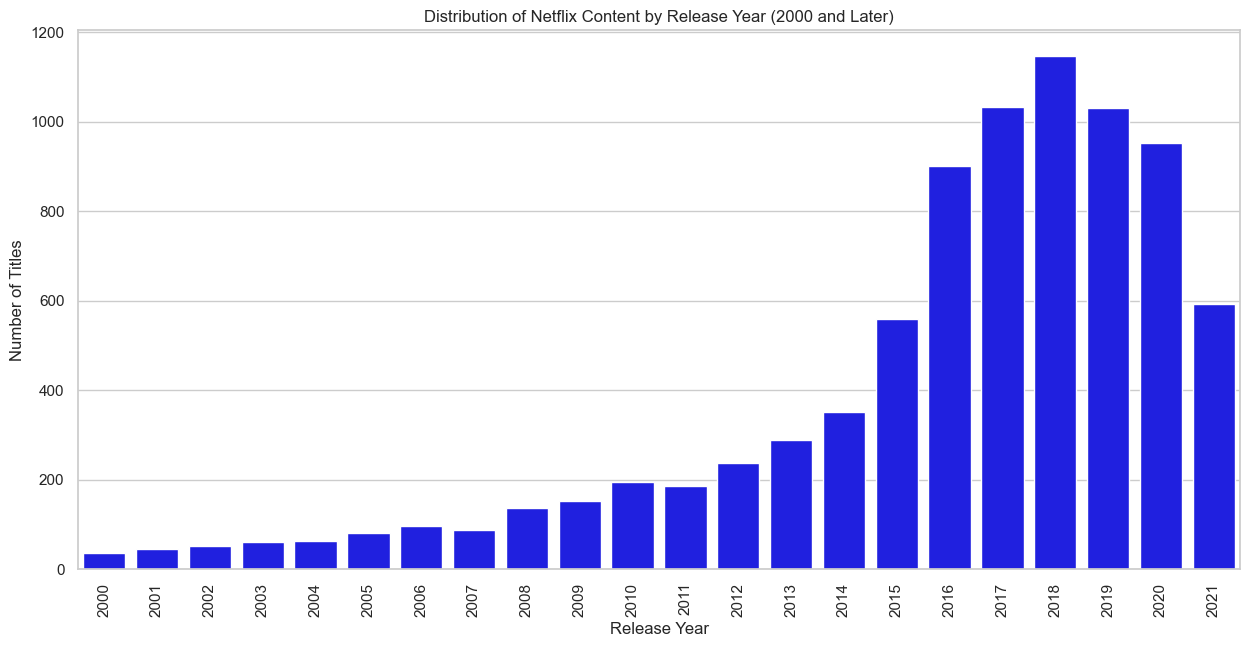

In [15]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_excel("C:/Users/Monster/Desktop/Exploring Netflix Movie and TV Series Trends.xlsx")

# 2000 and later
df_recent = df[df['release_year'] >= 2000]

# Calculate number of items by release_year
content_per_year = df_recent['release_year'].value_counts().sort_index()

# Chart plot
plt.figure(figsize=(15, 7))
sns.barplot(x=content_per_year.index, y=content_per_year.values, color='blue')
plt.title('Distribution of Netflix Content by Release Year (2000 and Later)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

In [17]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
From the graph, we observe a steady increase in the number of titles released each year starting from 2000, reaching a peak around 2018-2019. 
This trend indicates that Netflix has significantly expanded its content library over the years, especially in the late 2010s, 
likely due to increased production of original content and global expansion. However, there is a slight drop in 2020, possibly influenced 
by the COVID-19 pandemic’s impact on film and TV production worldwide.

In [ ]:
Q2: Are Movies or TV Series More Popular on Netflix?

In [21]:
df['type'].describe()

count      8807
unique        2
top       Movie
freq       6131
Name: type, dtype: object

C:\Users\Monster\AppData\Local\Temp\ipykernel_16176\3220185109.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


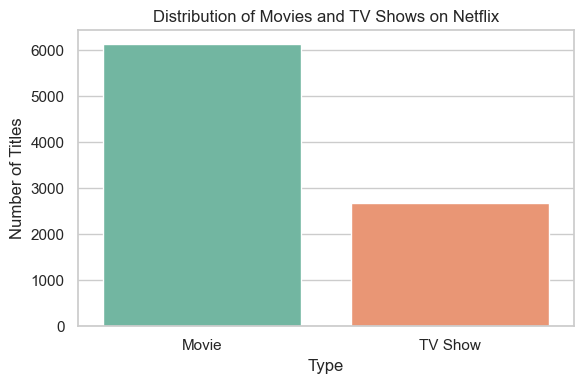

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stil
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Calculate numbers
type_counts = df['type'].value_counts()

# Chart
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.tight_layout()
plt.show()

In [ ]:
The vast majority of content on Netflix consists of movies. 
This may suggest that the platform places more emphasis on film production and licensing, or that user trends are in this direction.

In [ ]:
Q3: Which genres are more popular?

In [ ]:
Objective: To see the most represented content types on Netflix. That is, which content type is most commonly available to users?

Steps to Implement: I focus only on the listed_in column. 
I apply the “explode” technique to count each genre separated by commas. 
I count the most mentioned genres and show them in a graph.

C:\Users\Monster\AppData\Local\Temp\ipykernel_16176\834986138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


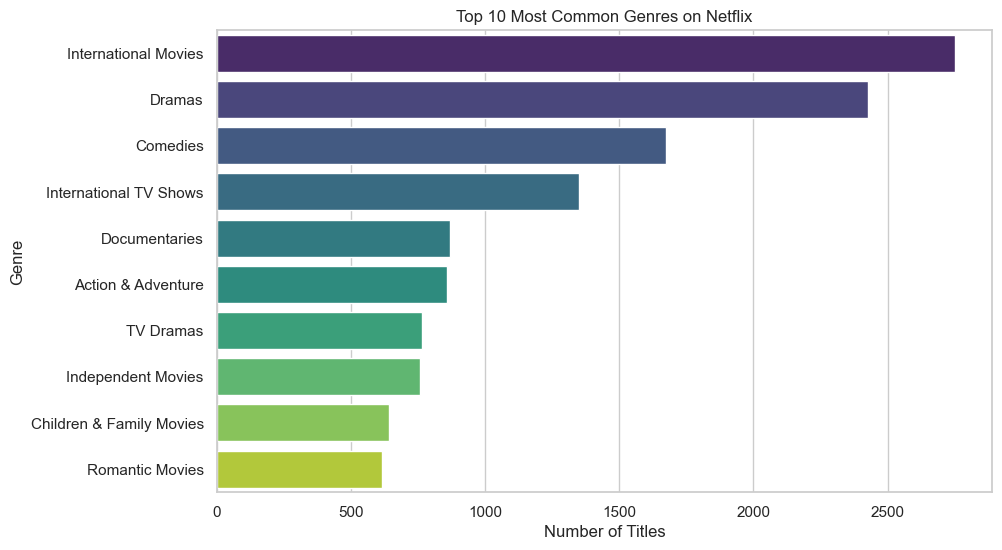

In [29]:
# Split and explode the types in the listed_in column by comma to separate each type
genre_series = df['listed_in'].str.split(', ').explode()

# Count how many times each species is mentioned
genre_counts = genre_series.value_counts().head(10)

# Chart plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [31]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [39]:
genre_counts = genre_series.value_counts().head(1)

In [41]:
genre_counts.head(1)

listed_in
International Movies    2752
Name: count, dtype: int64

In [ ]:
The result may give an idea about the “international movies” class interacting with more users due to the fact that the Netflix platform serves globally. 
Our results above showed that movies are consumed more than TV shows. here we see results that support this.

In [ ]:
Q4: Which countries provide the most content to Netflix?

In [ ]:
The countries that provide the content are in the country column, but this column may contain more than one country in some rows (e.g. “United States, India”). 
Therefore: 
-Separate the data by comma,
-Treat each country as a separate row,
-Count the countries that provide the most content.

C:\Users\Monster\AppData\Local\Temp\ipykernel_16176\2168370325.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries['count'], y=top_countries.index, palette='Blues_d')


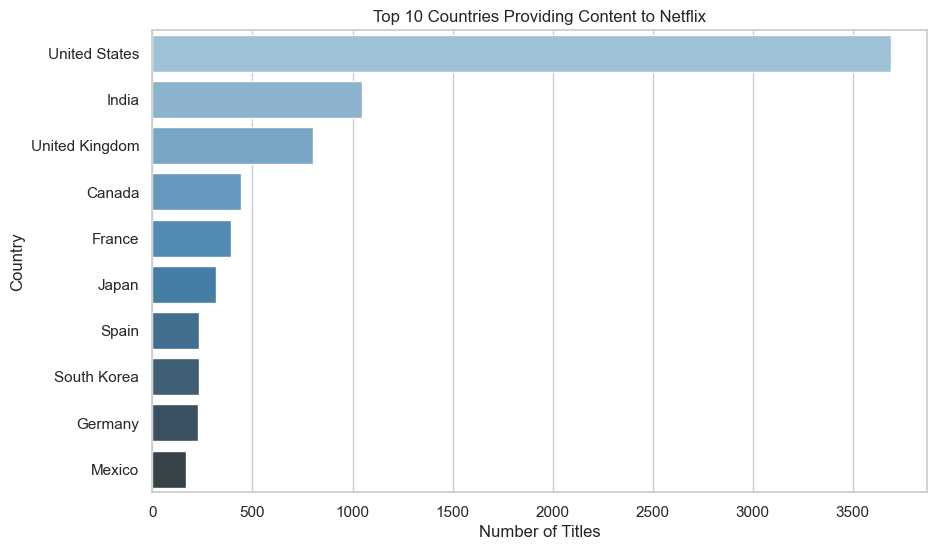

In [51]:
# Eksik country verilerini dışla
df_country = df.dropna(subset=['country'])

# Ülkeleri ayır ve her birini tek satıra indir
country_split = df_country['country'].str.split(', ', expand=True).stack()
country_split.name = 'country'
country_df = country_split.reset_index(level=1, drop=True).to_frame()
country_df['count'] = 1

# Ülkelere göre içerik sayısını topla
top_countries = country_df.groupby('country').count().sort_values(by='count', ascending=False).head(10)

# Görselleştir
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries['count'], y=top_countries.index, palette='Blues_d')
plt.title('Top 10 Countries Providing Content to Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
“The United States dominates the content supply on Netflix, followed by India and the United Kingdom. 
These countries likely reflect both production volume and target audience size.”

In [ ]:
Based on the analysis of the available country data, we found that:
The United States overwhelmingly dominates Netflix's content library, contributing the highest number of titles. 
It is followed by India, the United Kingdom, Canada, and Japan.
This distribution reflects Netflix's strong presence in the American market, as well as its growing investments in local content 
across populous regions like India. The variety in content origins also indicates Netflix’s global strategy to cater to diverse audiences.

In [ ]:
📁 Netflix Movies and TV Shows: Data Wrangling & Exploratory Data Analysis
🔍 Project Description:
Analyzed a Netflix dataset using Python, Pandas, and Matplotlib/Seaborn in Jupyter Notebook to uncover insights into content trends. The dataset was obtained from Kaggle and included information such as title, genre, release year, country, duration, and more.
Focus areas included data cleaning, wrangling, visualization, and identifying patterns in Netflix content.

📌 Yöneltilen Sorular ve Sonuçlar:
Q1: What is the distribution of content on Netflix by year?
Netflix’s content additions increased significantly after 2015, peaking around 2018–2019.

Q2: Are movies or TV series more popular on Netflix?
Movies vastly outnumber TV shows, showing a preference for film content on the platform.

Q3: Which genres are more popular?
The "International Movies" genre leads by a large margin, showing Netflix’s focus on global reach.

Q3 Extra: What is the typical duration of International Movies (post-2000)?
Most international movies fall within the 60–120 minutes range, with a peak around 90 minutes.

Q4: Which countries provide the most content to Netflix?
The U.S. is the largest content provider, followed by India, the UK, and Canada.